In [17]:
import mplfinance as mpf
import pandas as pd 
import numpy as np
import statsmodels.api as sm 
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as px
import datetime as dt 
import os 
from IPython.display import Image, display

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

sns.set()

In [2]:
df = pd.read_csv('Heart_Disease.csv')
df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.00,70.00,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.00,81.00,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.50,80.00,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.00,95.00,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.00,84.00,23.10,85,85,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3674 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3663 non-null   object 
 1   age              3674 non-null   int64  
 2   education        3674 non-null   int64  
 3   smokingStatus    3661 non-null   object 
 4   cigsPerDay       3674 non-null   int64  
 5   BPMeds           3674 non-null   int64  
 6   prevalentStroke  3674 non-null   int64  
 7   prevalentHyp     3674 non-null   int64  
 8   diabetes         3674 non-null   object 
 9   totChol          3674 non-null   int64  
 10  sysBP            3674 non-null   float64
 11  diaBP            3674 non-null   float64
 12  BMI              3674 non-null   float64
 13  heartRate        3674 non-null   int64  
 14  glucose          3674 non-null   int64  
 15  CHDRisk          3674 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 459.4+ KB


In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3652 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3652 non-null   object 
 1   age              3652 non-null   int64  
 2   education        3652 non-null   int64  
 3   smokingStatus    3652 non-null   object 
 4   cigsPerDay       3652 non-null   int64  
 5   BPMeds           3652 non-null   int64  
 6   prevalentStroke  3652 non-null   int64  
 7   prevalentHyp     3652 non-null   int64  
 8   diabetes         3652 non-null   object 
 9   totChol          3652 non-null   int64  
 10  sysBP            3652 non-null   float64
 11  diaBP            3652 non-null   float64
 12  BMI              3652 non-null   float64
 13  heartRate        3652 non-null   int64  
 14  glucose          3652 non-null   int64  
 15  CHDRisk          3652 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 485.0+ KB


In [7]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,"3,652.00","3,652.00","3,652.00","3,652.00","3,652.00","3,652.00","3,652.00","3,652.00","3,652.00","3,652.00","3,652.00","3,652.00"
mean,49.57,1.98,9.09,0.03,0.01,0.31,236.76,132.38,82.90,25.79,75.75,81.73
std,8.55,1.02,11.93,0.17,0.08,0.46,44.08,22.04,11.93,4.05,11.97,23.75
min,32.00,1.00,0.00,0.00,0.00,0.00,113.00,83.50,48.00,15.54,44.00,40.00
25%,42.00,1.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.09,68.00,71.00
50%,49.00,2.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.41,75.00,78.00
75%,56.00,3.00,20.00,0.00,0.00,1.00,263.00,143.50,89.62,28.02,82.00,87.00
max,70.00,4.00,70.00,1.00,1.00,1.00,600.00,295.00,142.50,56.80,143.00,394.00


In [8]:
df = df.drop_duplicates()

In [9]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,"3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00","3,637.00"
mean,49.55,1.98,9.03,0.03,0.01,0.31,236.88,132.36,82.90,25.79,75.75,81.81
std,8.56,1.02,11.91,0.17,0.08,0.46,44.13,22.08,11.96,4.06,11.99,23.77
min,32.00,1.00,0.00,0.00,0.00,0.00,113.00,83.50,48.00,15.54,44.00,40.00
25%,42.00,1.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.08,68.00,71.00
50%,49.00,2.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.38,75.00,78.00
75%,56.00,3.00,20.00,0.00,0.00,1.00,263.00,144.00,90.00,28.04,82.00,87.00
max,70.00,4.00,70.00,1.00,1.00,1.00,600.00,295.00,142.50,56.80,143.00,394.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3637 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3637 non-null   object 
 1   age              3637 non-null   int64  
 2   education        3637 non-null   int64  
 3   smokingStatus    3637 non-null   object 
 4   cigsPerDay       3637 non-null   int64  
 5   BPMeds           3637 non-null   int64  
 6   prevalentStroke  3637 non-null   int64  
 7   prevalentHyp     3637 non-null   int64  
 8   diabetes         3637 non-null   object 
 9   totChol          3637 non-null   int64  
 10  sysBP            3637 non-null   float64
 11  diaBP            3637 non-null   float64
 12  BMI              3637 non-null   float64
 13  heartRate        3637 non-null   int64  
 14  glucose          3637 non-null   int64  
 15  CHDRisk          3637 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 483.0+ KB


In [11]:
df['BPMeds'] = df['BPMeds'].astype('object')
df['prevalentStroke'] = df['prevalentStroke'].astype('object')
df['prevalentHyp'] = df['prevalentHyp'].astype('object')

df.loc[:, 'BPMeds'] = df['BPMeds'].replace([0,1], ['no', 'yes'])
df.loc[:, 'prevalentStroke'] = df['prevalentStroke'].replace([0,1], ['no', 'yes'])
df.loc[:, 'prevalentHyp'] = df['prevalentHyp'].replace([0,1], ['no', 'yes'])

C:\Users\alhef\AppData\Local\Temp\ipykernel_13360\2655644621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BPMeds'] = df['BPMeds'].astype('object')
C:\Users\alhef\AppData\Local\Temp\ipykernel_13360\2655644621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prevalentStroke'] = df['prevalentStroke'].astype('object')
C:\Users\alhef\AppData\Local\Temp\ipykernel_13360\2655644621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3637 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3637 non-null   object 
 1   age              3637 non-null   int64  
 2   education        3637 non-null   int64  
 3   smokingStatus    3637 non-null   object 
 4   cigsPerDay       3637 non-null   int64  
 5   BPMeds           3637 non-null   object 
 6   prevalentStroke  3637 non-null   object 
 7   prevalentHyp     3637 non-null   object 
 8   diabetes         3637 non-null   object 
 9   totChol          3637 non-null   int64  
 10  sysBP            3637 non-null   float64
 11  diaBP            3637 non-null   float64
 12  BMI              3637 non-null   float64
 13  heartRate        3637 non-null   int64  
 14  glucose          3637 non-null   int64  
 15  CHDRisk          3637 non-null   object 
dtypes: float64(3), int64(6), object(7)
memory usage: 483.0+ KB


# Univariate Analysis

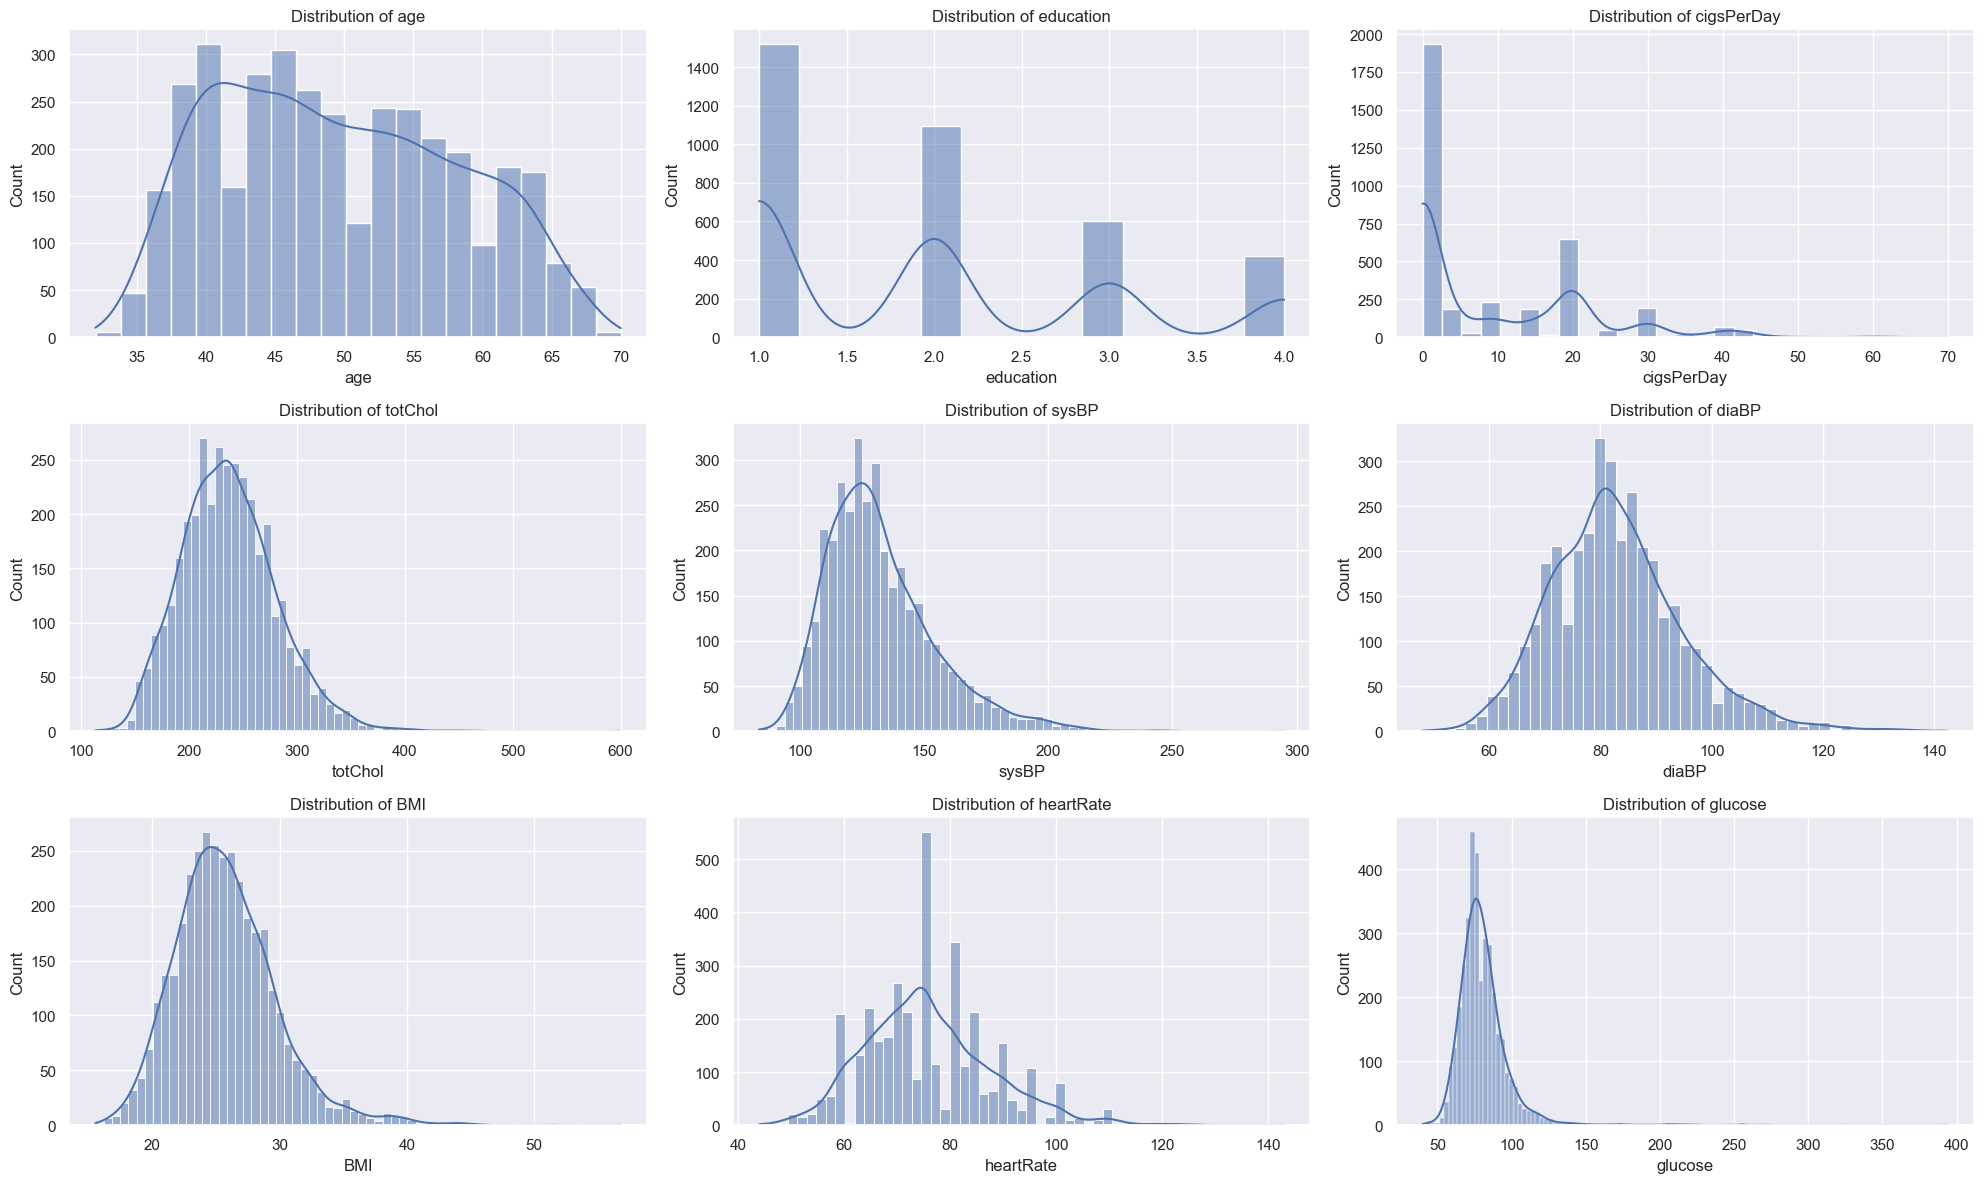

In [13]:
plt.figure(figsize=(20,12))
for e, i in enumerate(df.select_dtypes('number')):
    plt.subplot(3,3, e+1)
    sns.histplot(df[i], kde=True)
    plt.title('Distribution of ' + i)
    plt.tight_layout()

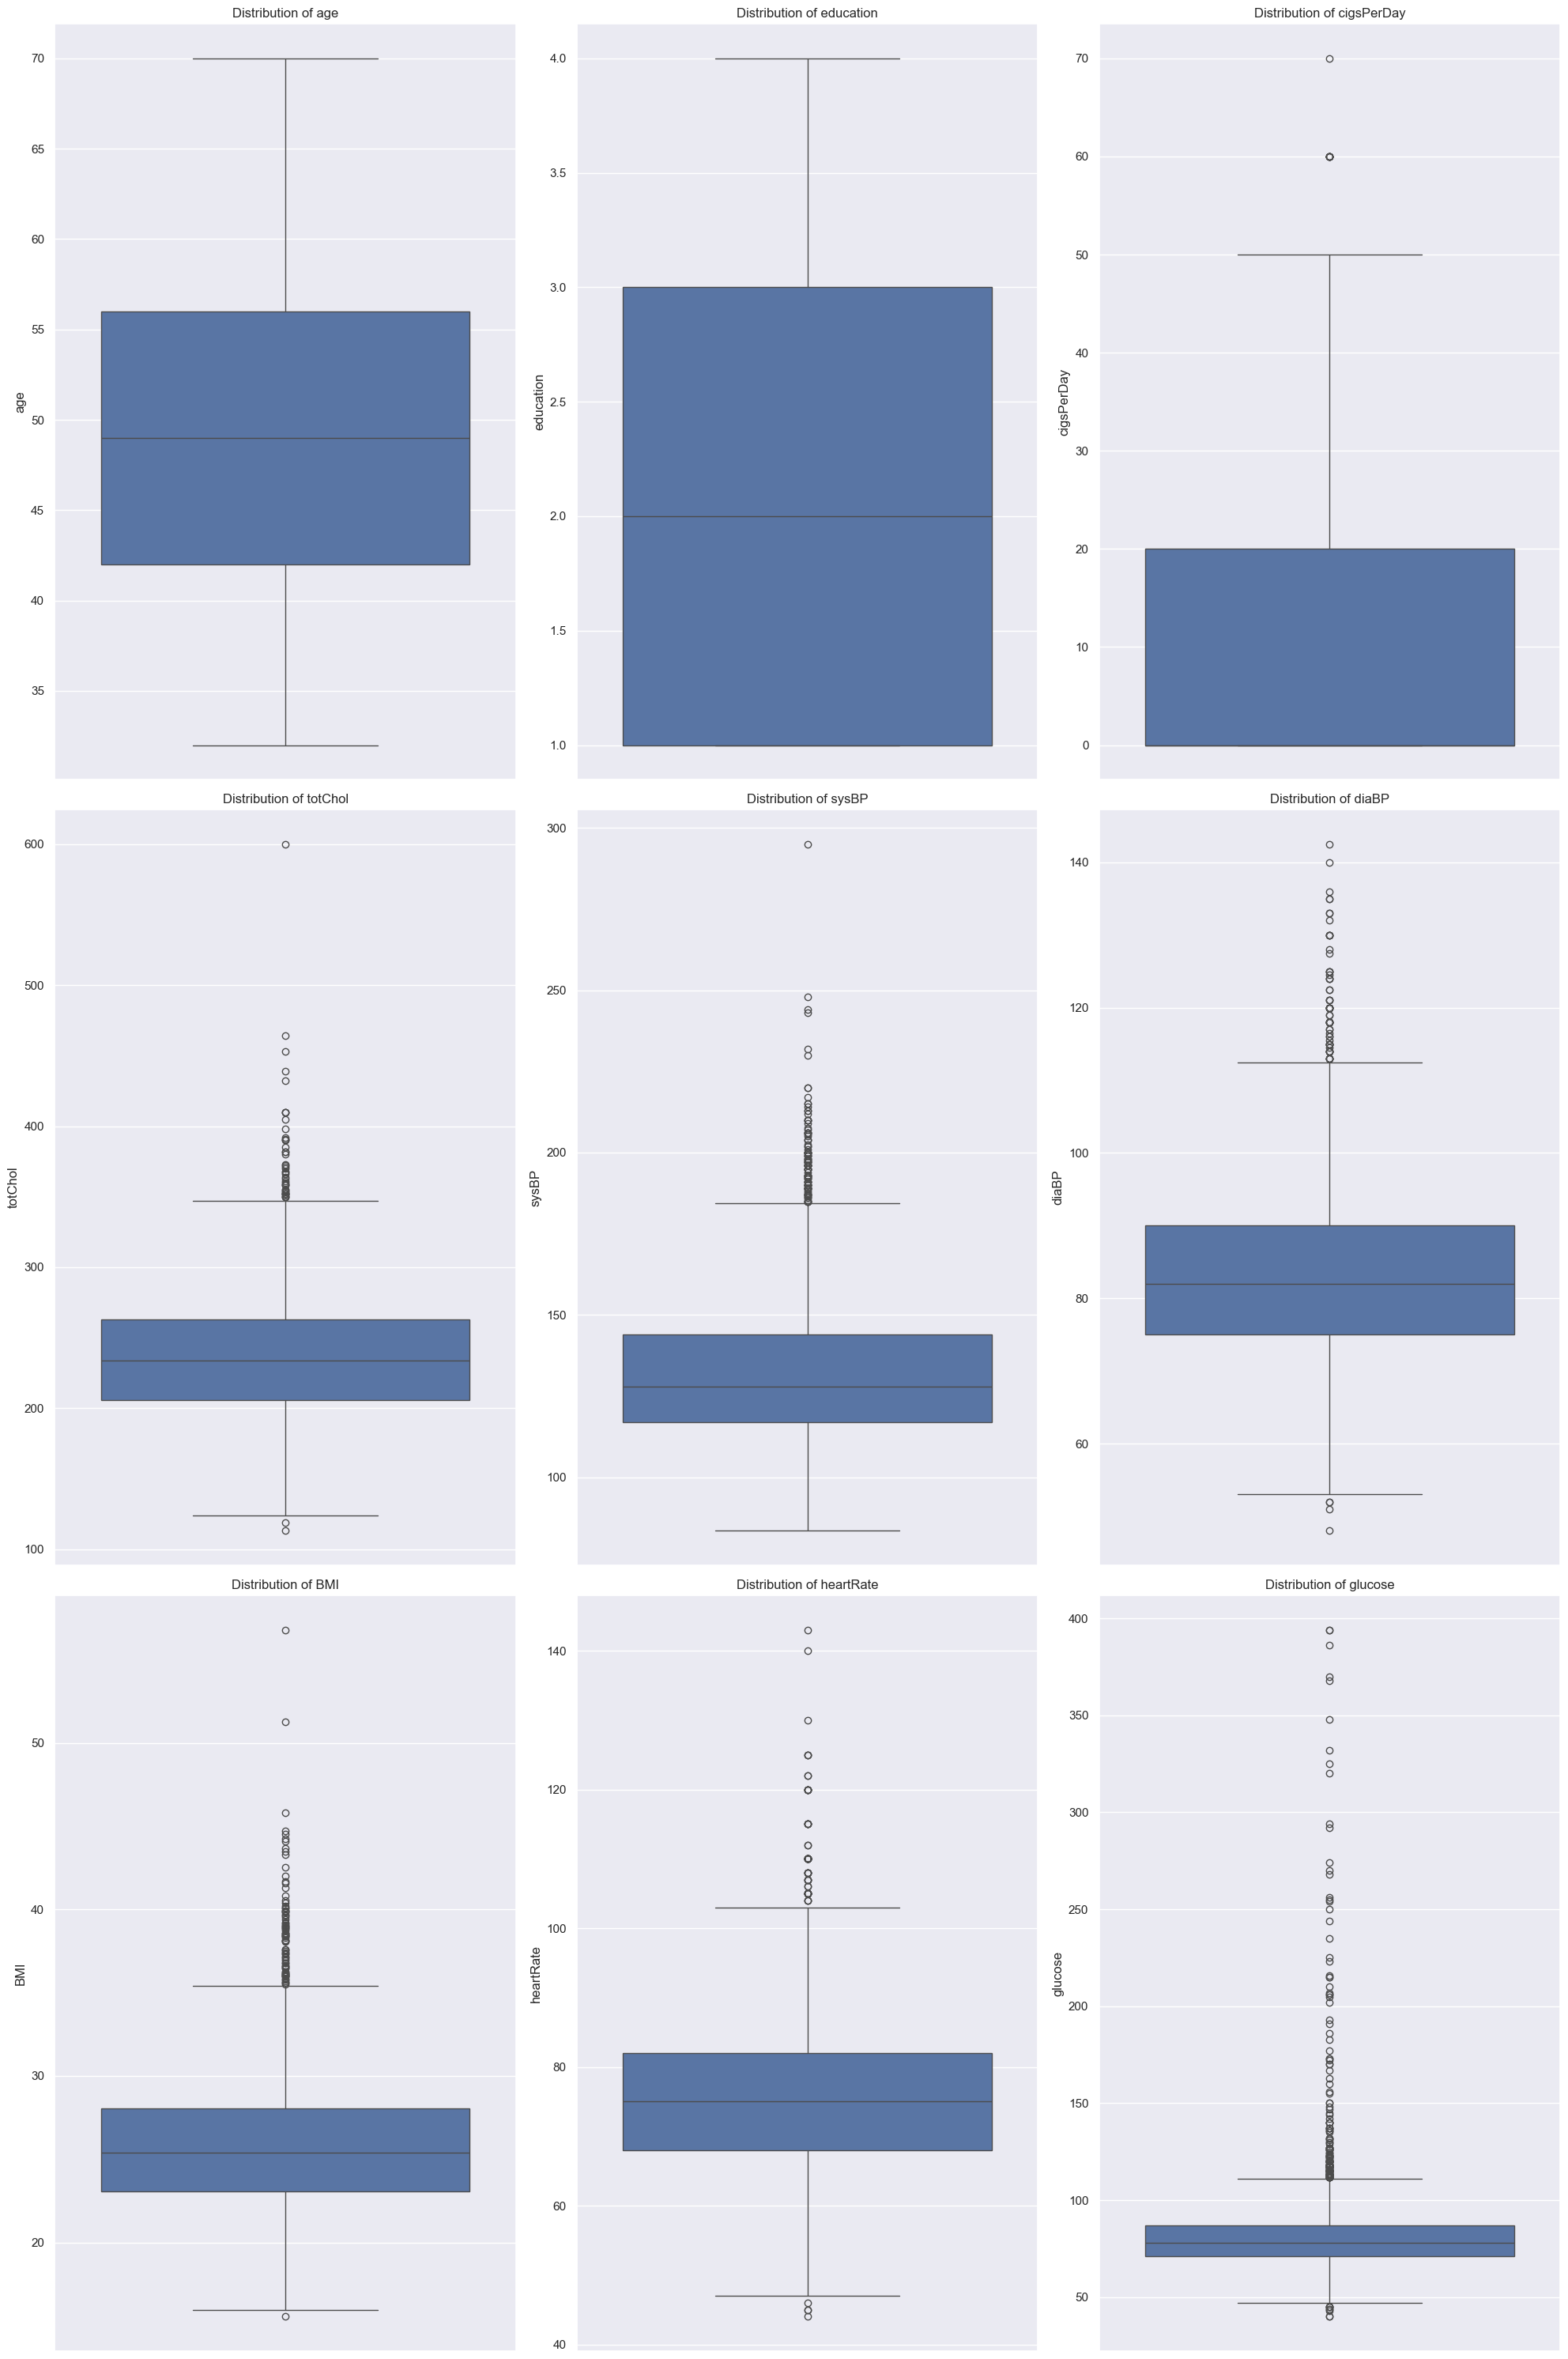

In [21]:
plt.figure(figsize=(20,30))
for e, i in enumerate(df.select_dtypes('number')):
    plt.subplot(3,3, e+1)
    sns.boxplot(df[i])
    plt.title('Distribution of ' + i)
    plt.tight_layout()

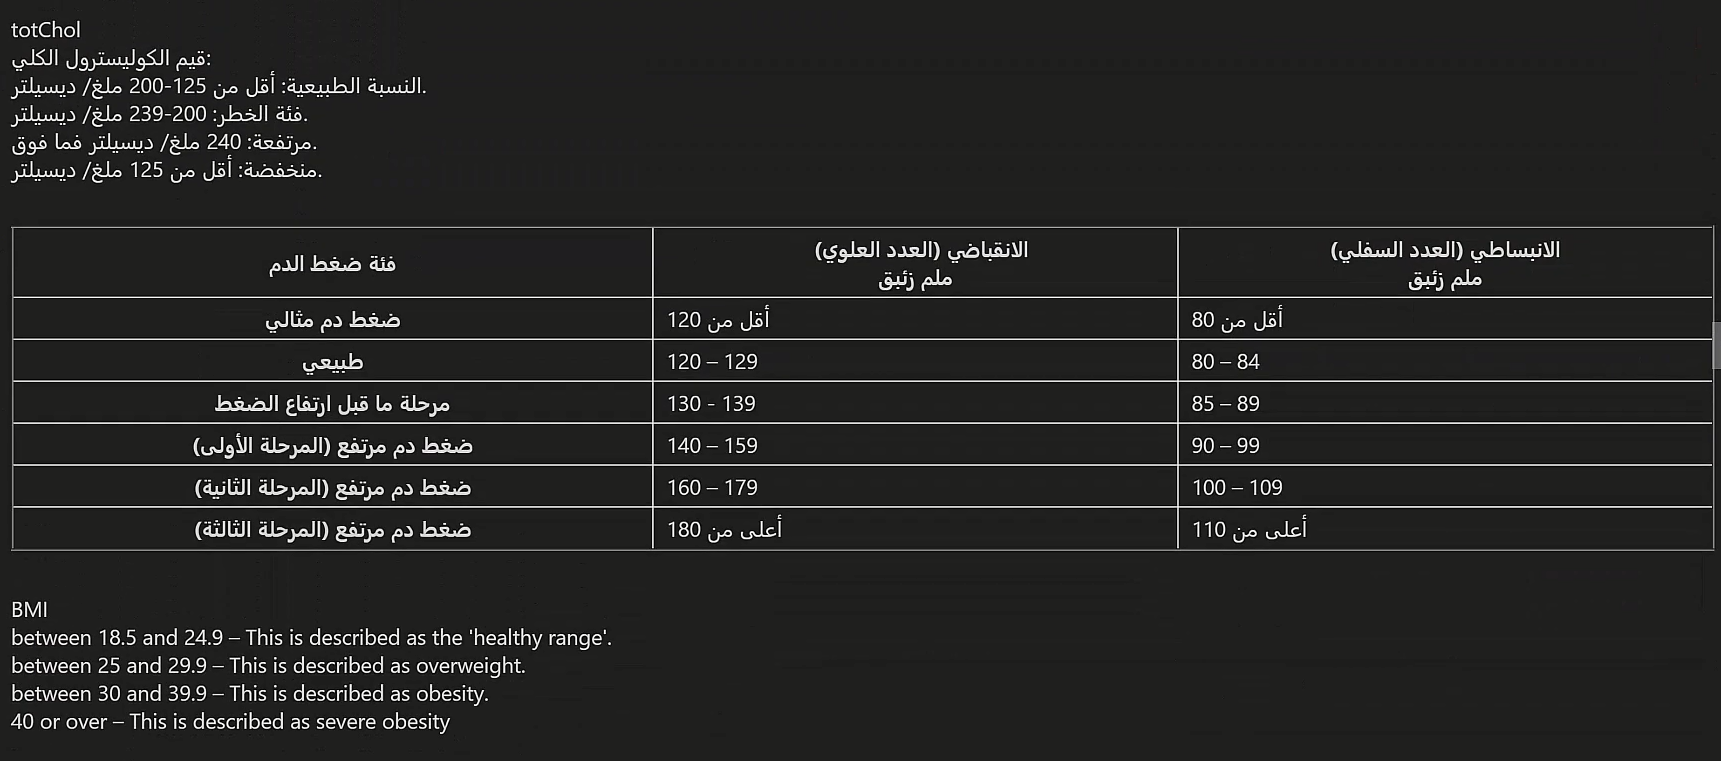

In [19]:
display(Image(filename=r"C:\Users\alhef\Downloads\Heart.png"))

In [22]:
df['healthy'] = np.where(
    (df['cigsPerDay'] >= 0) & (df['cigsPerDay'] <= 20) &
    (df['BPMeds'] == 'no') &
    (df['prevalentStroke'] == 'no') &
    (df['prevalentHyp'] == 'no') &
    (df['diabetes'] == 'no') &
    (df['totChol'] > 125) & (df['totChol'] <= 200) &
    (df['sysBP'] >= 120) & (df['sysBP'] <= 129) &
    (df['diaBP'] >= 80) & (df['diaBP'] <= 84) &
    (df['BMI'] >= 18.5) & (df['BMI'] <= 29.9) &
    (df['heartRate'] >= 60) & (df['heartRate'] <= 100) &
    (df['glucose'] >= 70) & (df['glucose'] <= 100),
    'yes', 'no'
)

In [23]:
df[df.healthy == 'yes']['healthy'].count()

np.int64(24)

In [29]:
print(df.columns)

Index(['sex', 'age', 'education', 'smokingStatus', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CHDRisk', 'healthy'],
      dtype='object')


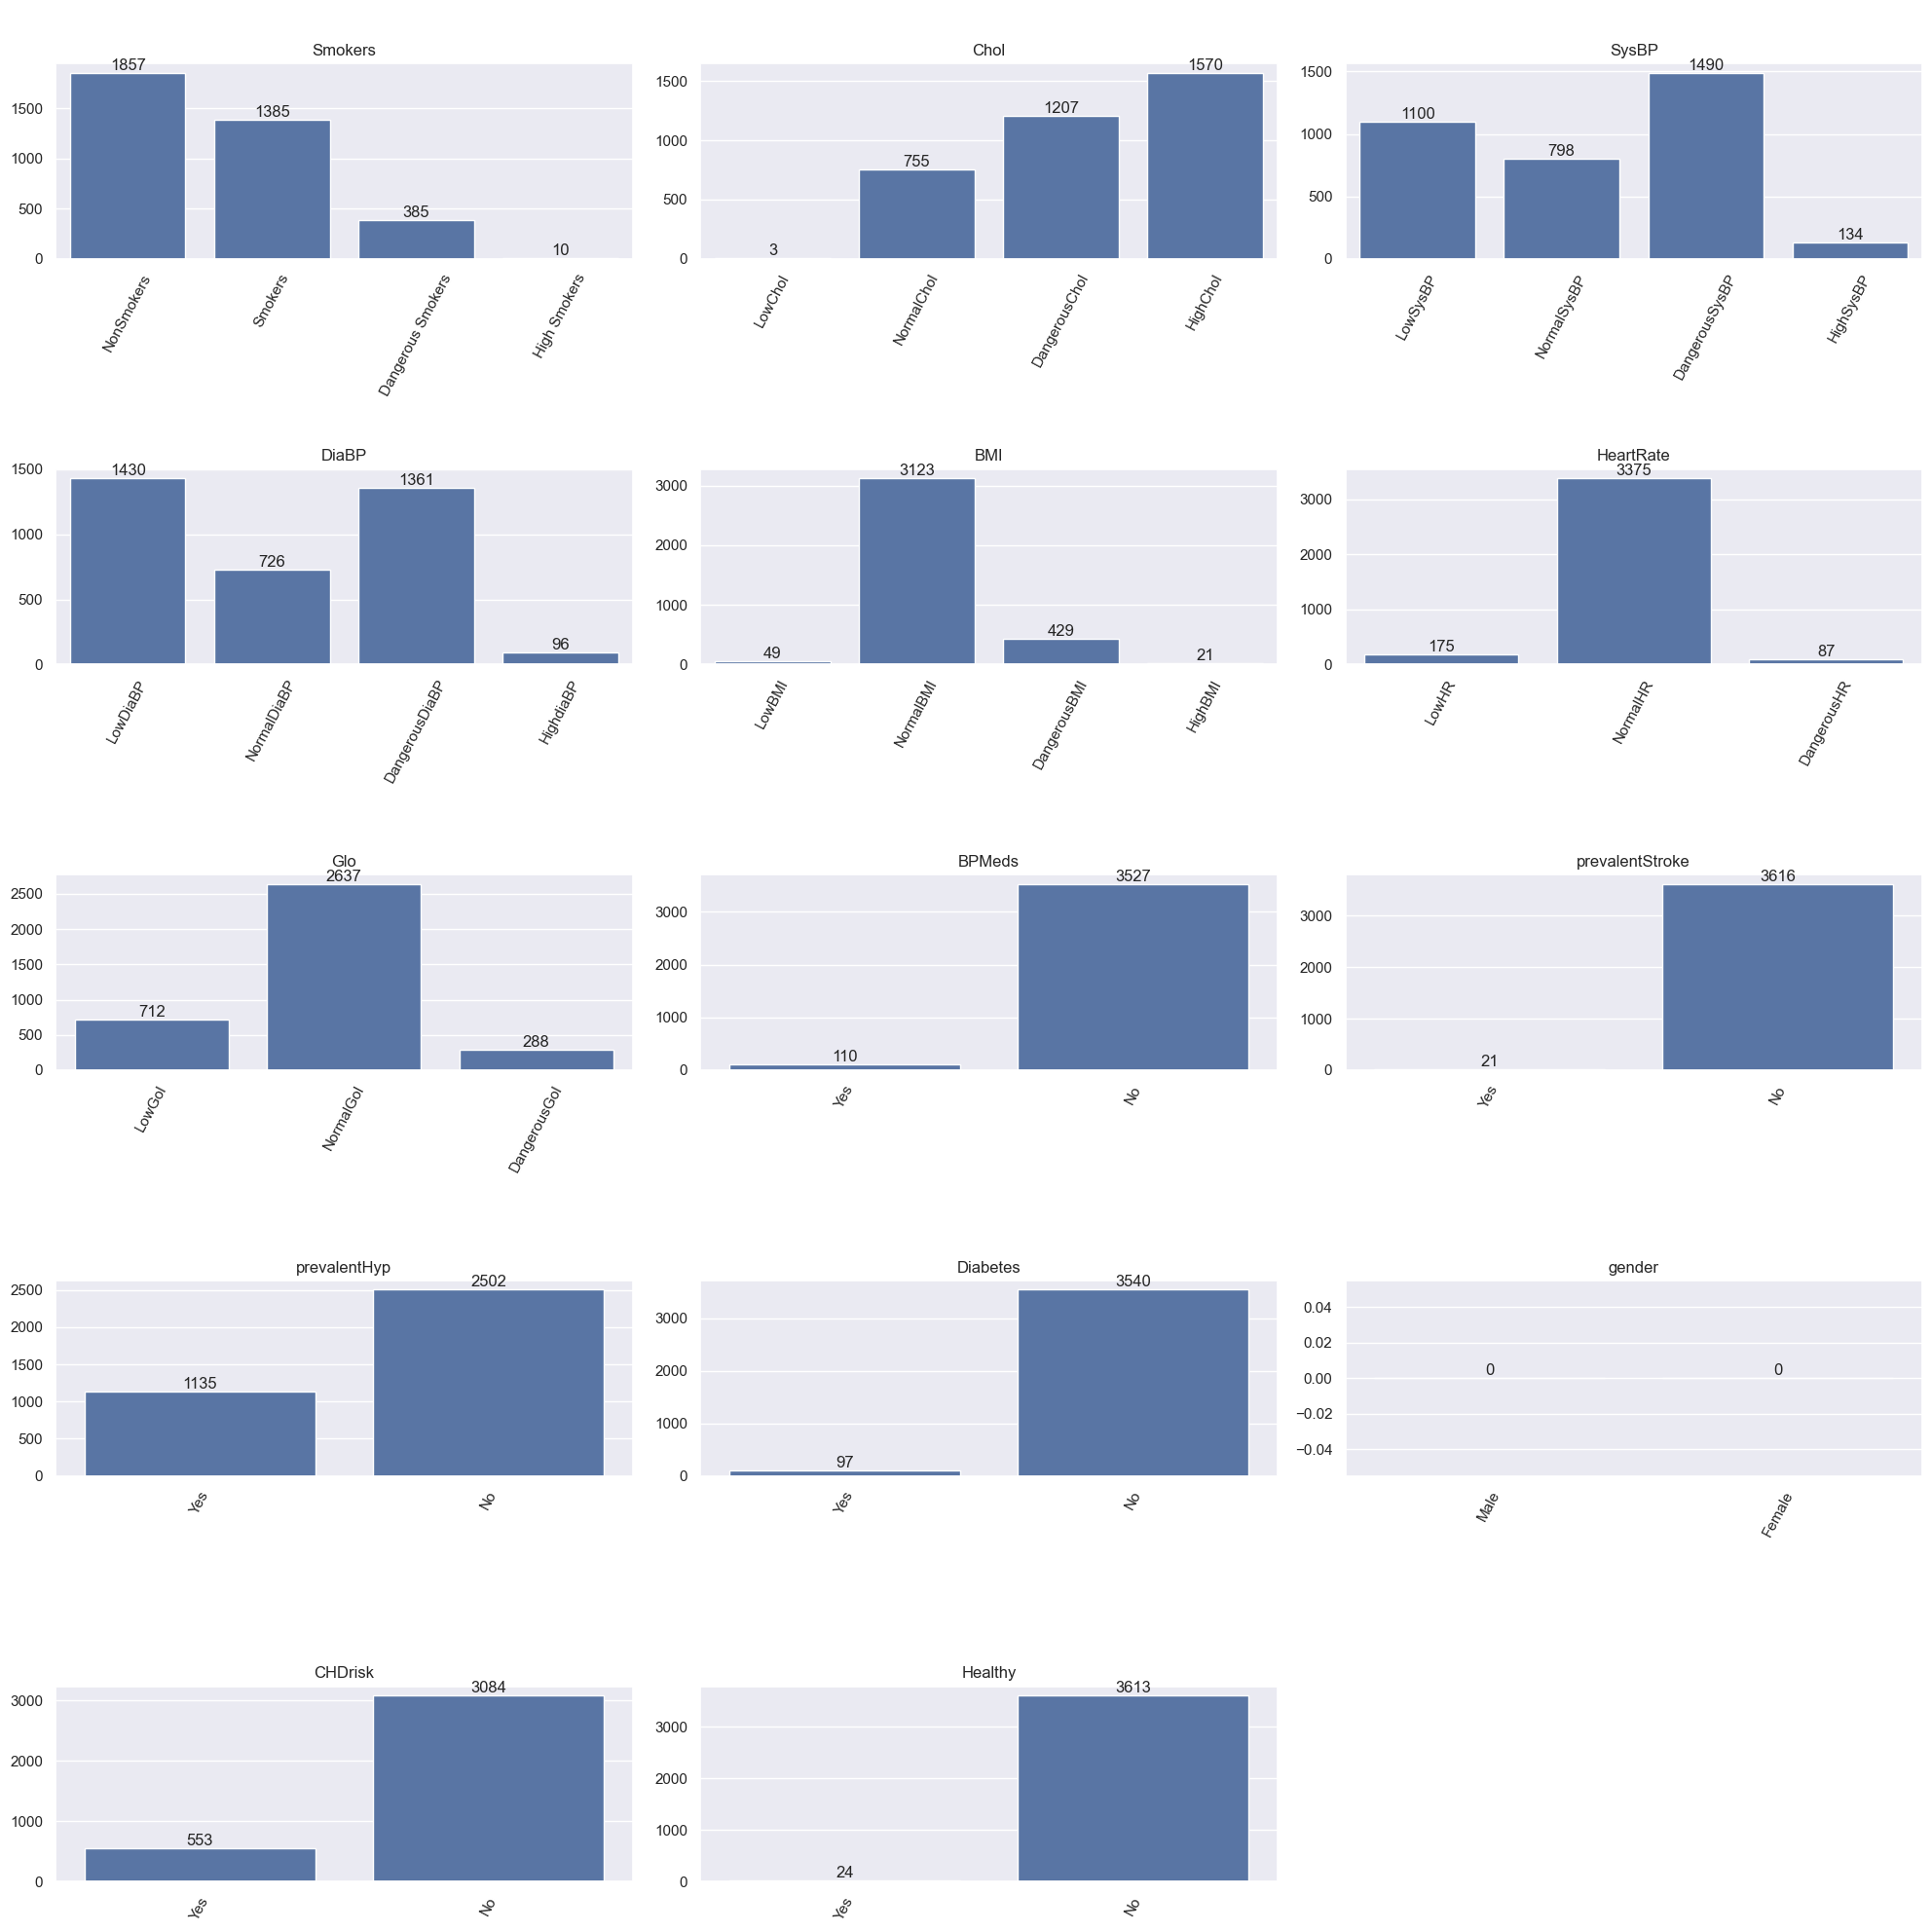

In [28]:
# SMOKERS
Smokers = {'NonSmokers' : df[df.cigsPerDay == 0]['cigsPerDay'].count(), 'Smokers' : df[(df.cigsPerDay > 0) & (df.cigsPerDay <= 20)]['cigsPerDay'].count(), 'Dangerous Smokers' : df[(df.cigsPerDay > 20) & (df.cigsPerDay <= 50)]['cigsPerDay'].count(), 'High Smokers' : df[df.cigsPerDay > 50]['cigsPerDay'].count()}
# CHOLESTEROl
Chol = {'LowChol' : df[df.totChol < 125]['totChol'].count(), 'NormalChol' : df[(df.totChol > 125) & (df.totChol <= 200)]['totChol'].count(), 'DangerousChol' : df[(df.totChol > 200) & (df.totChol < 239)]['totChol'].count(), 'HighChol' : df[df.totChol > 240]['totChol'].count()}
# SYSBP
SysBP = {'LowSysBP' : df[df.sysBP < 120]['sysBP'].count(), 'NormalSysBP' : df[(df.sysBP >= 120) & (df.sysBP <= 129)]['sysBP'].count(), 'DangerousSysBP' : df[(df.sysBP > 130) & (df.sysBP < 179)]['sysBP'].count(), 'HighSysBP' : df[df.sysBP > 180]['sysBP'].count()}
# DIABP
DiaBP = {'LowDiaBP' : df[df.diaBP < 80]['diaBP'].count(), 'NormalDiaBP' : df[(df.diaBP >= 80) & (df.diaBP <= 84)]['diaBP'].count(), 'DangerousDiaBP' : df[(df.diaBP >= 85) & (df.diaBP < 109)]['diaBP'].count(), 'HighdiaBP' : df[df.diaBP >= 110]['diaBP'].count()}
# BMI
BMI = {'LowBMI' : df[df.BMI < 18.5]['BMI'].count(), 'NormalBMI' : df[(df.BMI >= 18.5) & (df.BMI <= 29.9)]['BMI'].count(), 'DangerousBMI' : df[(df.BMI >= 30) & (df.BMI < 39.9)]['BMI'].count(), 'HighBMI' : df[df.BMI >= 40]['BMI'].count()}
# HEARTRATE
HeartRate = {'LowHR' : df[df.heartRate < 60]['heartRate'].count(), 'NormalHR' : df[(df.heartRate >= 60) & (df.heartRate <= 100)]['heartRate'].count(), 'DangerousHR' : df[df.heartRate > 100]['heartRate'].count()}

# GLOCOUS
Glo = {'LowGol' : df[df.glucose < 70]['glucose'].count(), 'NormalGol' : df[(df.glucose >= 70) & (df.glucose <= 100)]['glucose'].count(), 'DangerousGol' : df[df.glucose > 100]['glucose'].count()}

BPMeds = {'Yes' : df[df.BPMeds == 'yes']['BPMeds'].count(), 'No' : df[df.BPMeds == 'no']['BPMeds'].count()}

prevalentStroke = {'Yes' : df[df.prevalentStroke == 'yes']['prevalentStroke'].count(), 'No' : df[df.prevalentStroke == 'no']['prevalentStroke'].count()}

prevalentHyp = {'Yes' : df[df.prevalentHyp == 'yes']['prevalentHyp'].count(), 'No' : df[df.prevalentHyp == 'no']['prevalentHyp'].count()}

gender = {
    'Male': df[df['sex'] == 'Male']['sex'].count(),
    'Female': df[df['sex'] == 'Female']['sex'].count()
}

CHDrisk = {
    'Yes': df[df['CHDRisk'] == 'yes']['CHDRisk'].count(),
    'No': df[df['CHDRisk'] == 'no']['CHDRisk'].count()
}

Diabetes = {'Yes' : df[df.diabetes == 'yes']['diabetes'].count(), 'No' : df[df.diabetes == 'no']['diabetes'].count()}

Healthy = {'Yes' : df[df.healthy == 'yes']['healthy'].count(), 'No' : df[df.healthy == 'no']['healthy'].count()}

dicts = [Smokers, Chol, SysBP, DiaBP, BMI, HeartRate, Glo, BPMeds, prevalentStroke, prevalentHyp, Diabetes, gender, CHDrisk, Healthy]

dicts_title = ['Smokers', 'Chol', 'SysBP', 'DiaBP', 'BMI', 'HeartRate', 'Glo', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'Diabetes', 'gender', 'CHDrisk', 'Healthy']

plt.figure(figsize=(20, 20))

from matplotlib.ticker import FixedLocator
for e, dict in enumerate(dicts):
    d = pd.DataFrame(dict.items(), columns=['Classification', 'Value'])
    plt.subplot(5, 3, e+1)
    ax = sns.barplot(data=d, x='Classification', y='Value')
    ax.bar_label(ax.containers[0])
    ax.set_title('\n\n' + dicts_title[e])
    ax.set_xlabel('')  # Remove the x-axis label 'Classification'
    ax.set_ylabel('')  # Remove the y-axis label 'Value'
    # Get the current locations and labels.
    locs, labels = plt.xticks()

    # Set the locations and labels.
    ax.xaxis.set_major_locator(FixedLocator(locs))
    ax.set_xticklabels(labels, rotation=62)

plt.tight_layout()
plt.show()

Plot 12: لا توجد بيانات صالحة للرسم


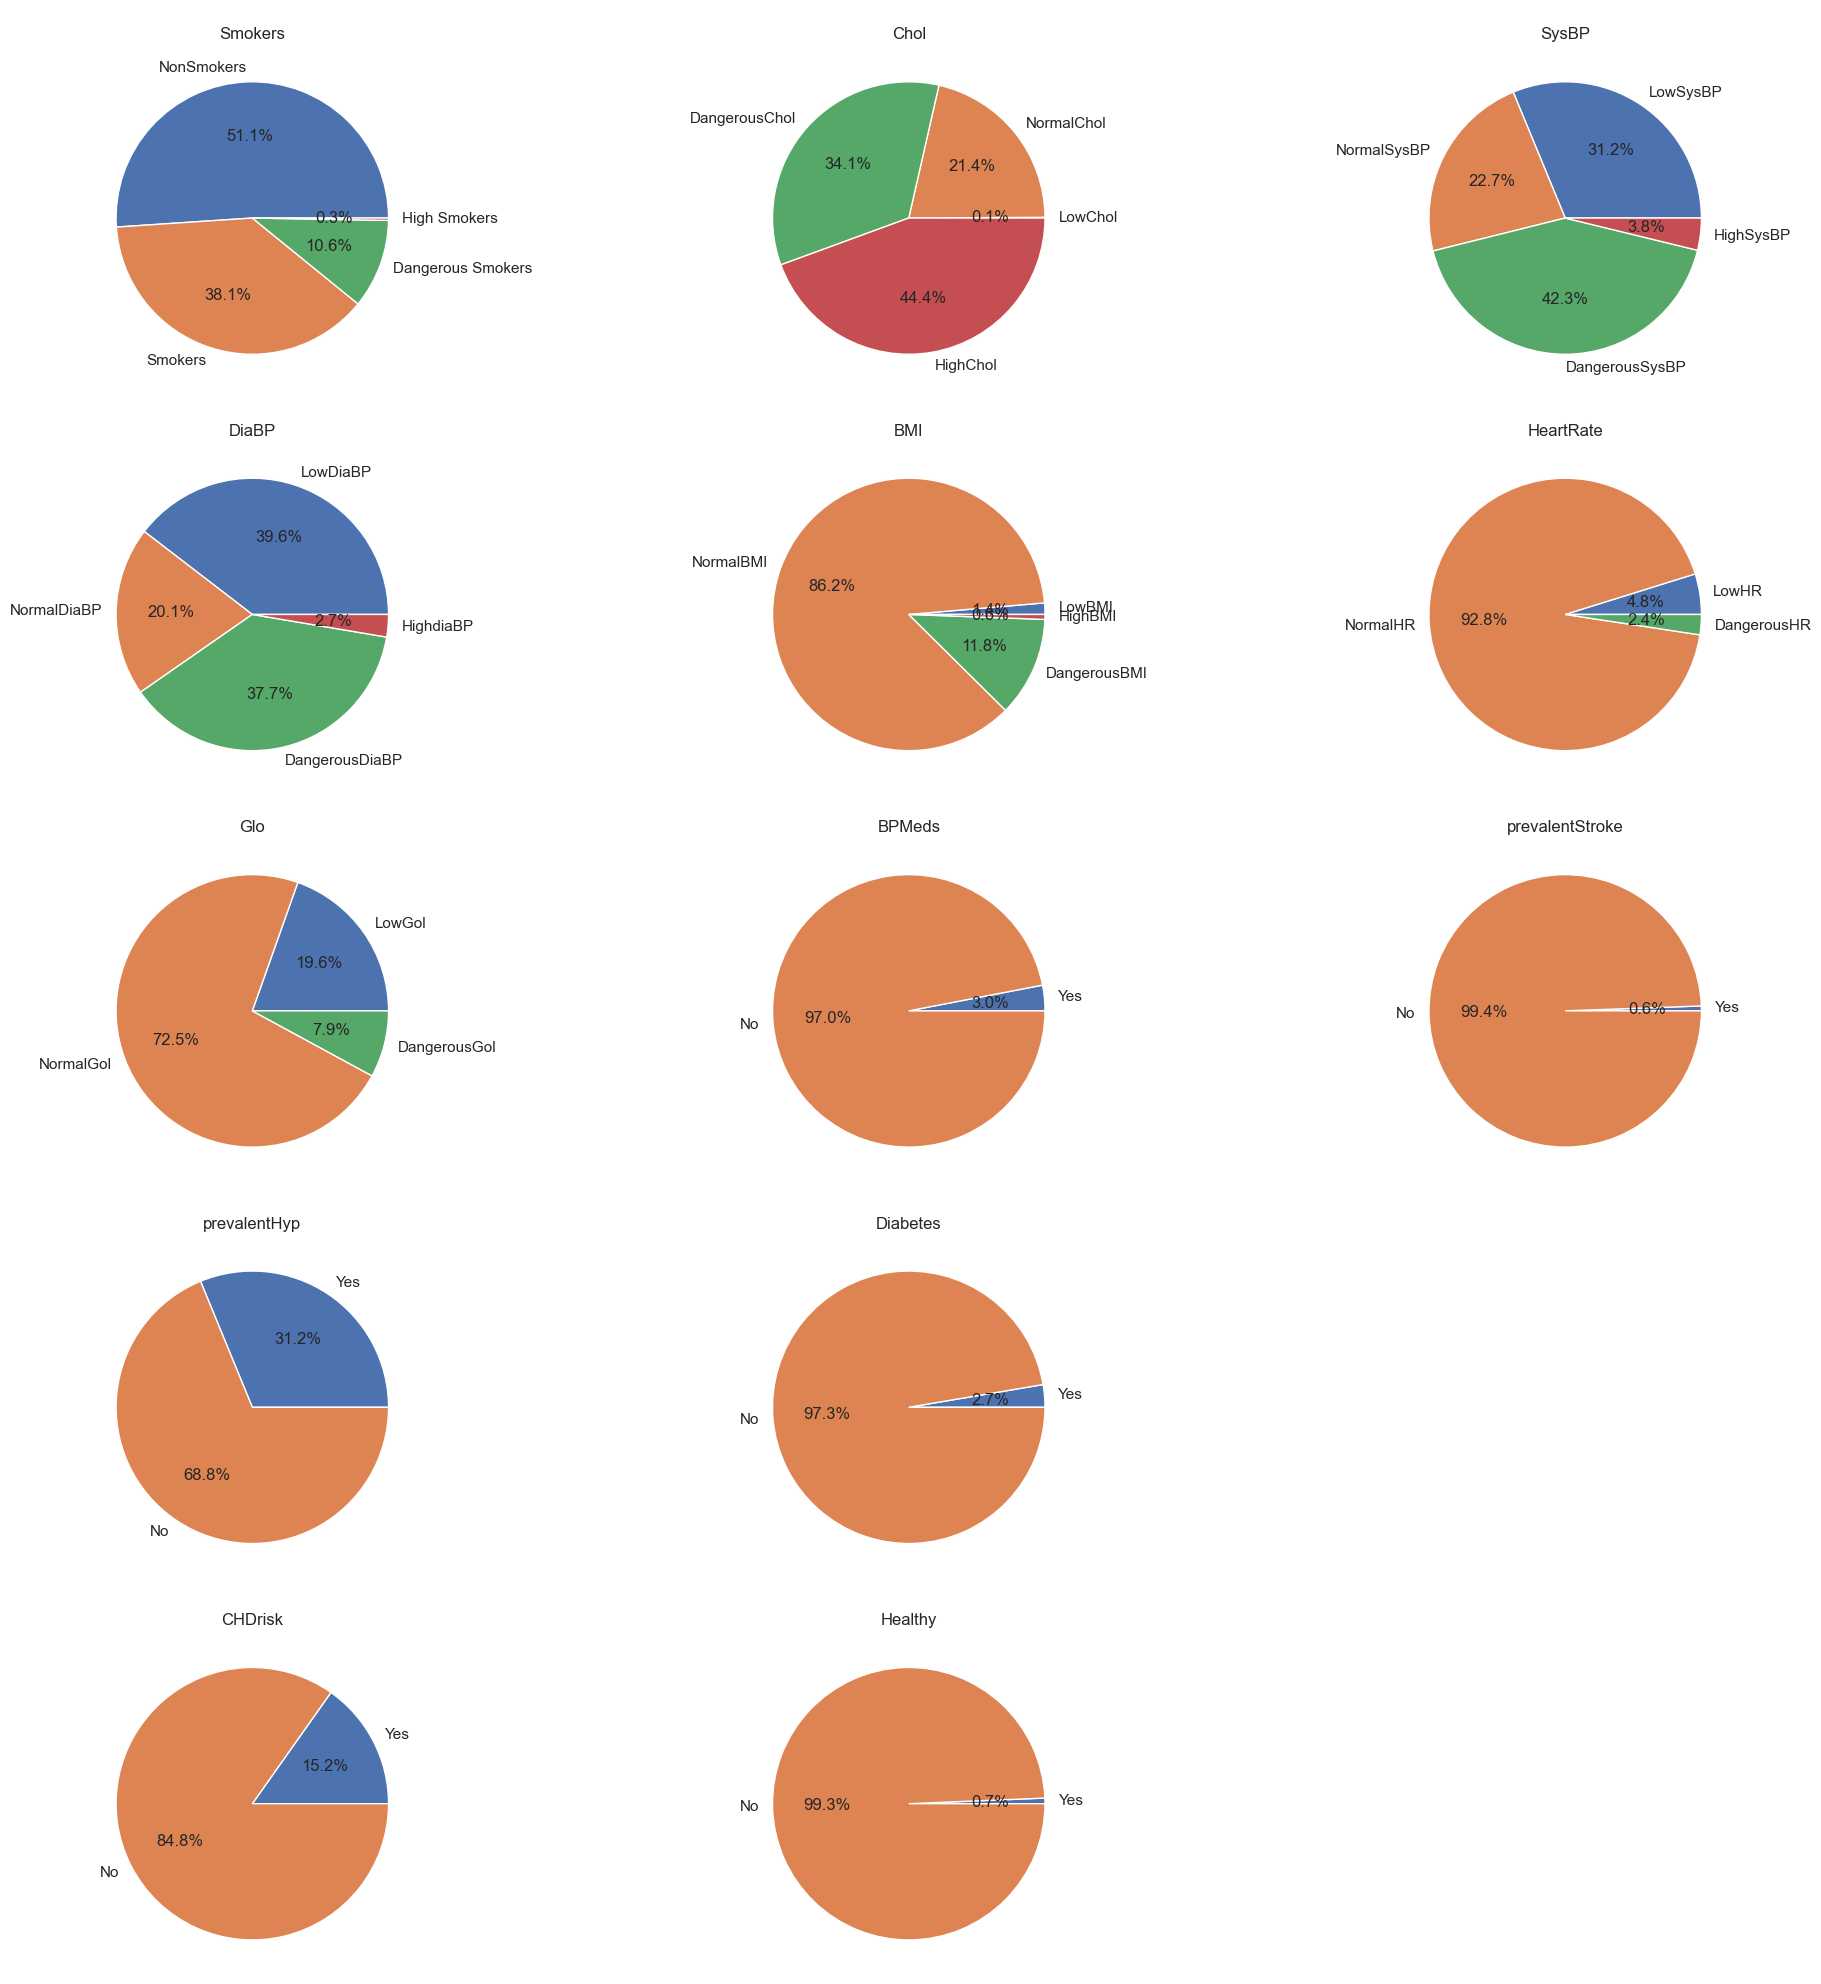

In [33]:

plt.figure(figsize=(20, 20))

for e, data_dict in enumerate(dicts):  # متغير بدل dict
    # إنشاء DataFrame
    d = pd.DataFrame(data_dict.items(), columns=['Classification', 'Value'])
    
    # تجاهل الصفوف اللي Value فيها NaN
    d = d.dropna(subset=['Value'])
    
    # لو فيه على الأقل قيمة أكبر من صفر
    if d['Value'].sum() > 0:
        plt.subplot(5, 3, e+1)
        plt.pie(d['Value'], labels=d['Classification'], autopct='%1.1f%%')
        plt.title('\n' + dicts_title[e])
    else:
        print(f"Plot {e+1}: لا توجد بيانات صالحة للرسم")

plt.tight_layout()
plt.show()

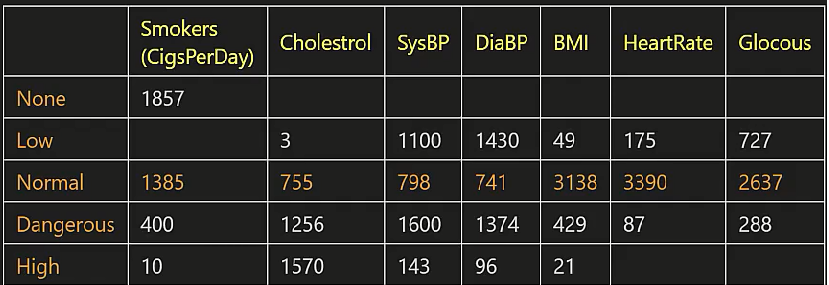

In [36]:
display(Image(filename=r"C:\Users\alhef\Downloads\heart 7.png"))

In [37]:
df[df.healthy ==  'yes']

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk,healthy
119,female,50,3,yes,15,no,no,no,no,150,121.00,84.00,28.69,75,88,no,yes
190,male,45,4,yes,18,no,no,no,no,176,124.00,84.00,20.27,77,75,no,yes
419,female,39,2,no,0,no,no,no,no,190,120.00,80.00,27.16,70,85,no,yes
625,female,38,2,yes,1,no,no,no,no,200,124.00,84.00,20.67,80,75,no,yes
1046,female,40,1,yes,15,no,no,no,no,199,122.00,82.00,22.16,85,77,no,yes
1061,male,40,1,no,0,no,no,no,no,137,127.00,82.00,27.04,60,71,no,yes
1156,female,39,3,no,0,no,no,no,no,180,124.00,83.00,22.91,66,77,no,yes
1209,male,36,4,no,0,no,no,no,no,172,122.50,82.50,28.53,82,75,no,yes
1380,male,53,1,no,0,no,no,no,no,157,123.00,83.00,19.94,75,88,no,yes
1824,female,40,3,yes,5,no,no,no,no,143,125.50,80.00,21.99,71,95,no,yes


# MultiVariate Analysis

In [38]:
df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk,healthy
0,male,39,4,no,0,no,no,no,no,195,106.00,70.00,26.97,80,77,no,no
1,female,46,2,no,0,no,no,no,no,250,121.00,81.00,28.73,95,76,no,no
2,male,48,1,yes,20,no,no,no,no,245,127.50,80.00,25.34,75,70,no,no
3,female,61,3,yes,30,no,no,yes,no,225,150.00,95.00,28.58,65,103,yes,no
4,female,46,3,yes,23,no,no,no,no,285,130.00,84.00,23.10,85,85,no,no


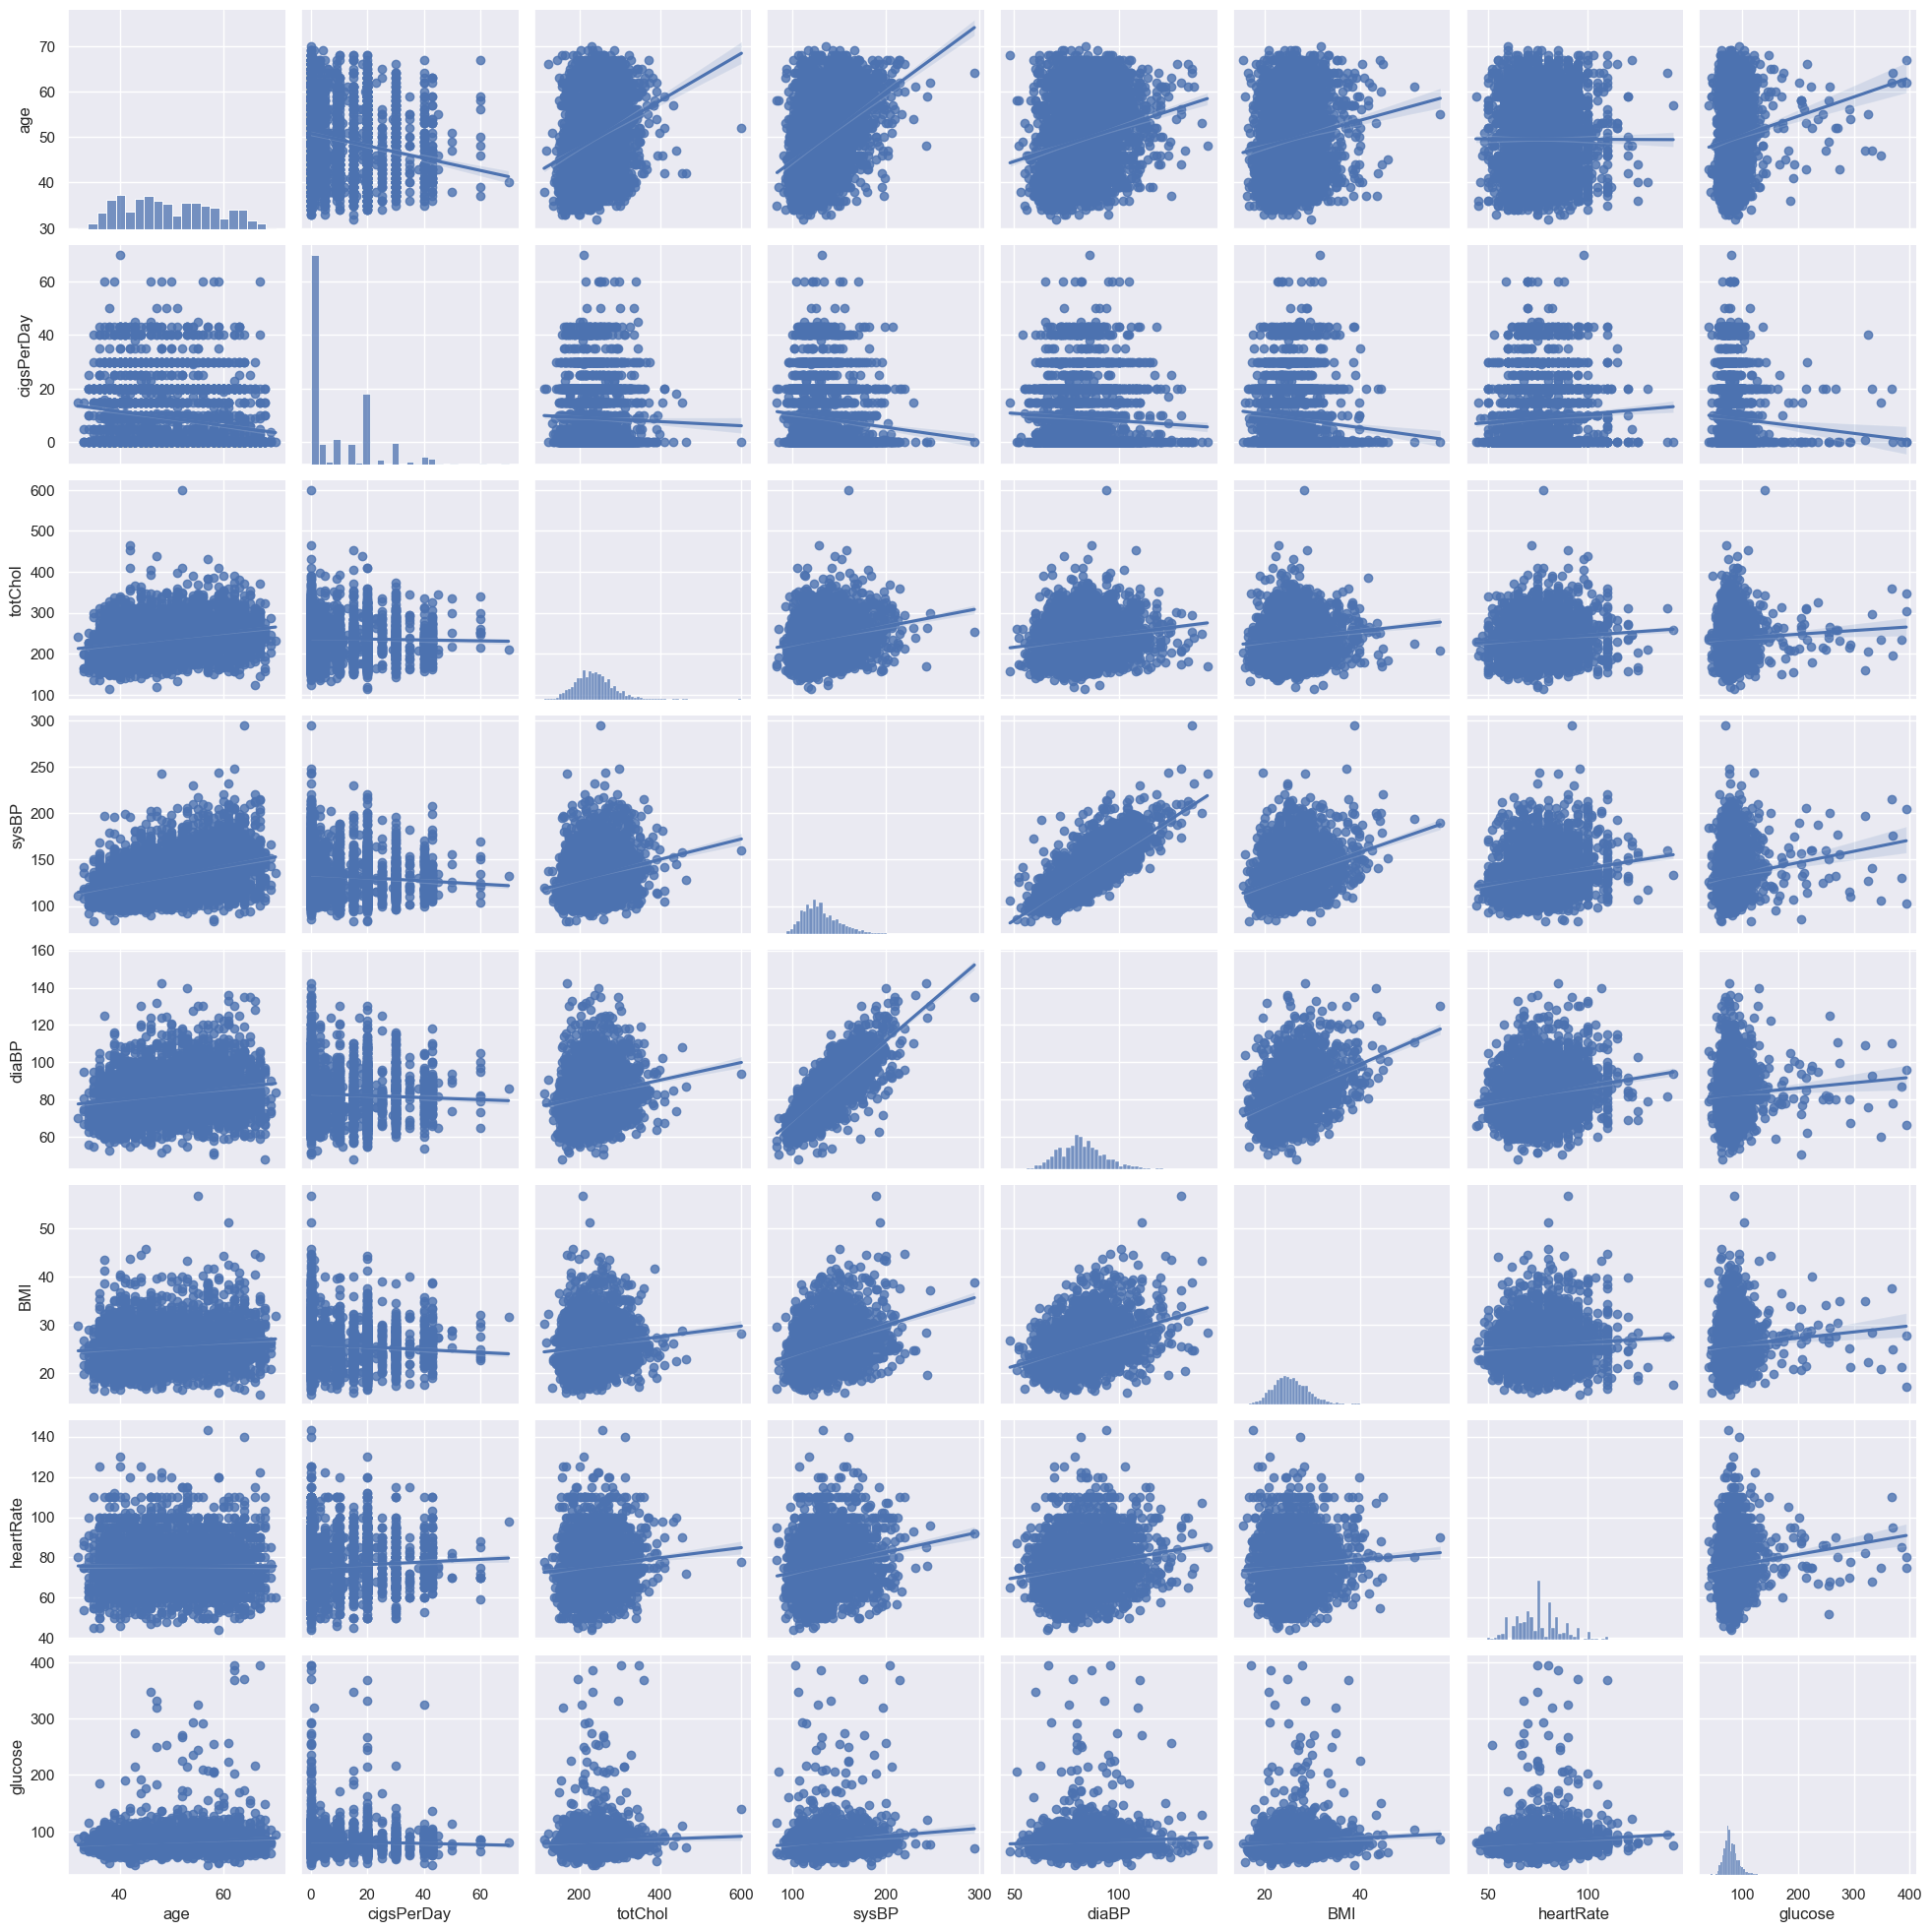

In [39]:
pairs = df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
sns.pairplot(pairs, kind= 'reg')

<Axes: >

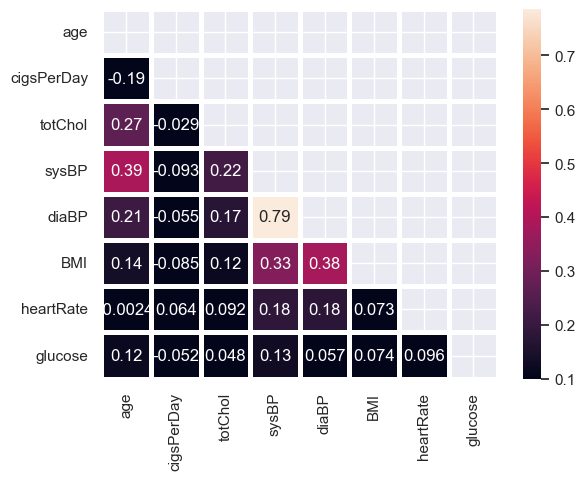

In [40]:
mask = np.zeros_like(pairs.corr())
mask[np.triu_indices_from(mask)] = True
mask
sns.heatmap(pairs.corr(), annot=True, vmin=0.1, mask=mask, linewidths=2.5)

In [43]:
bool = df[['sex', 'smokingStatus', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'CHDRisk', 'healthy']]

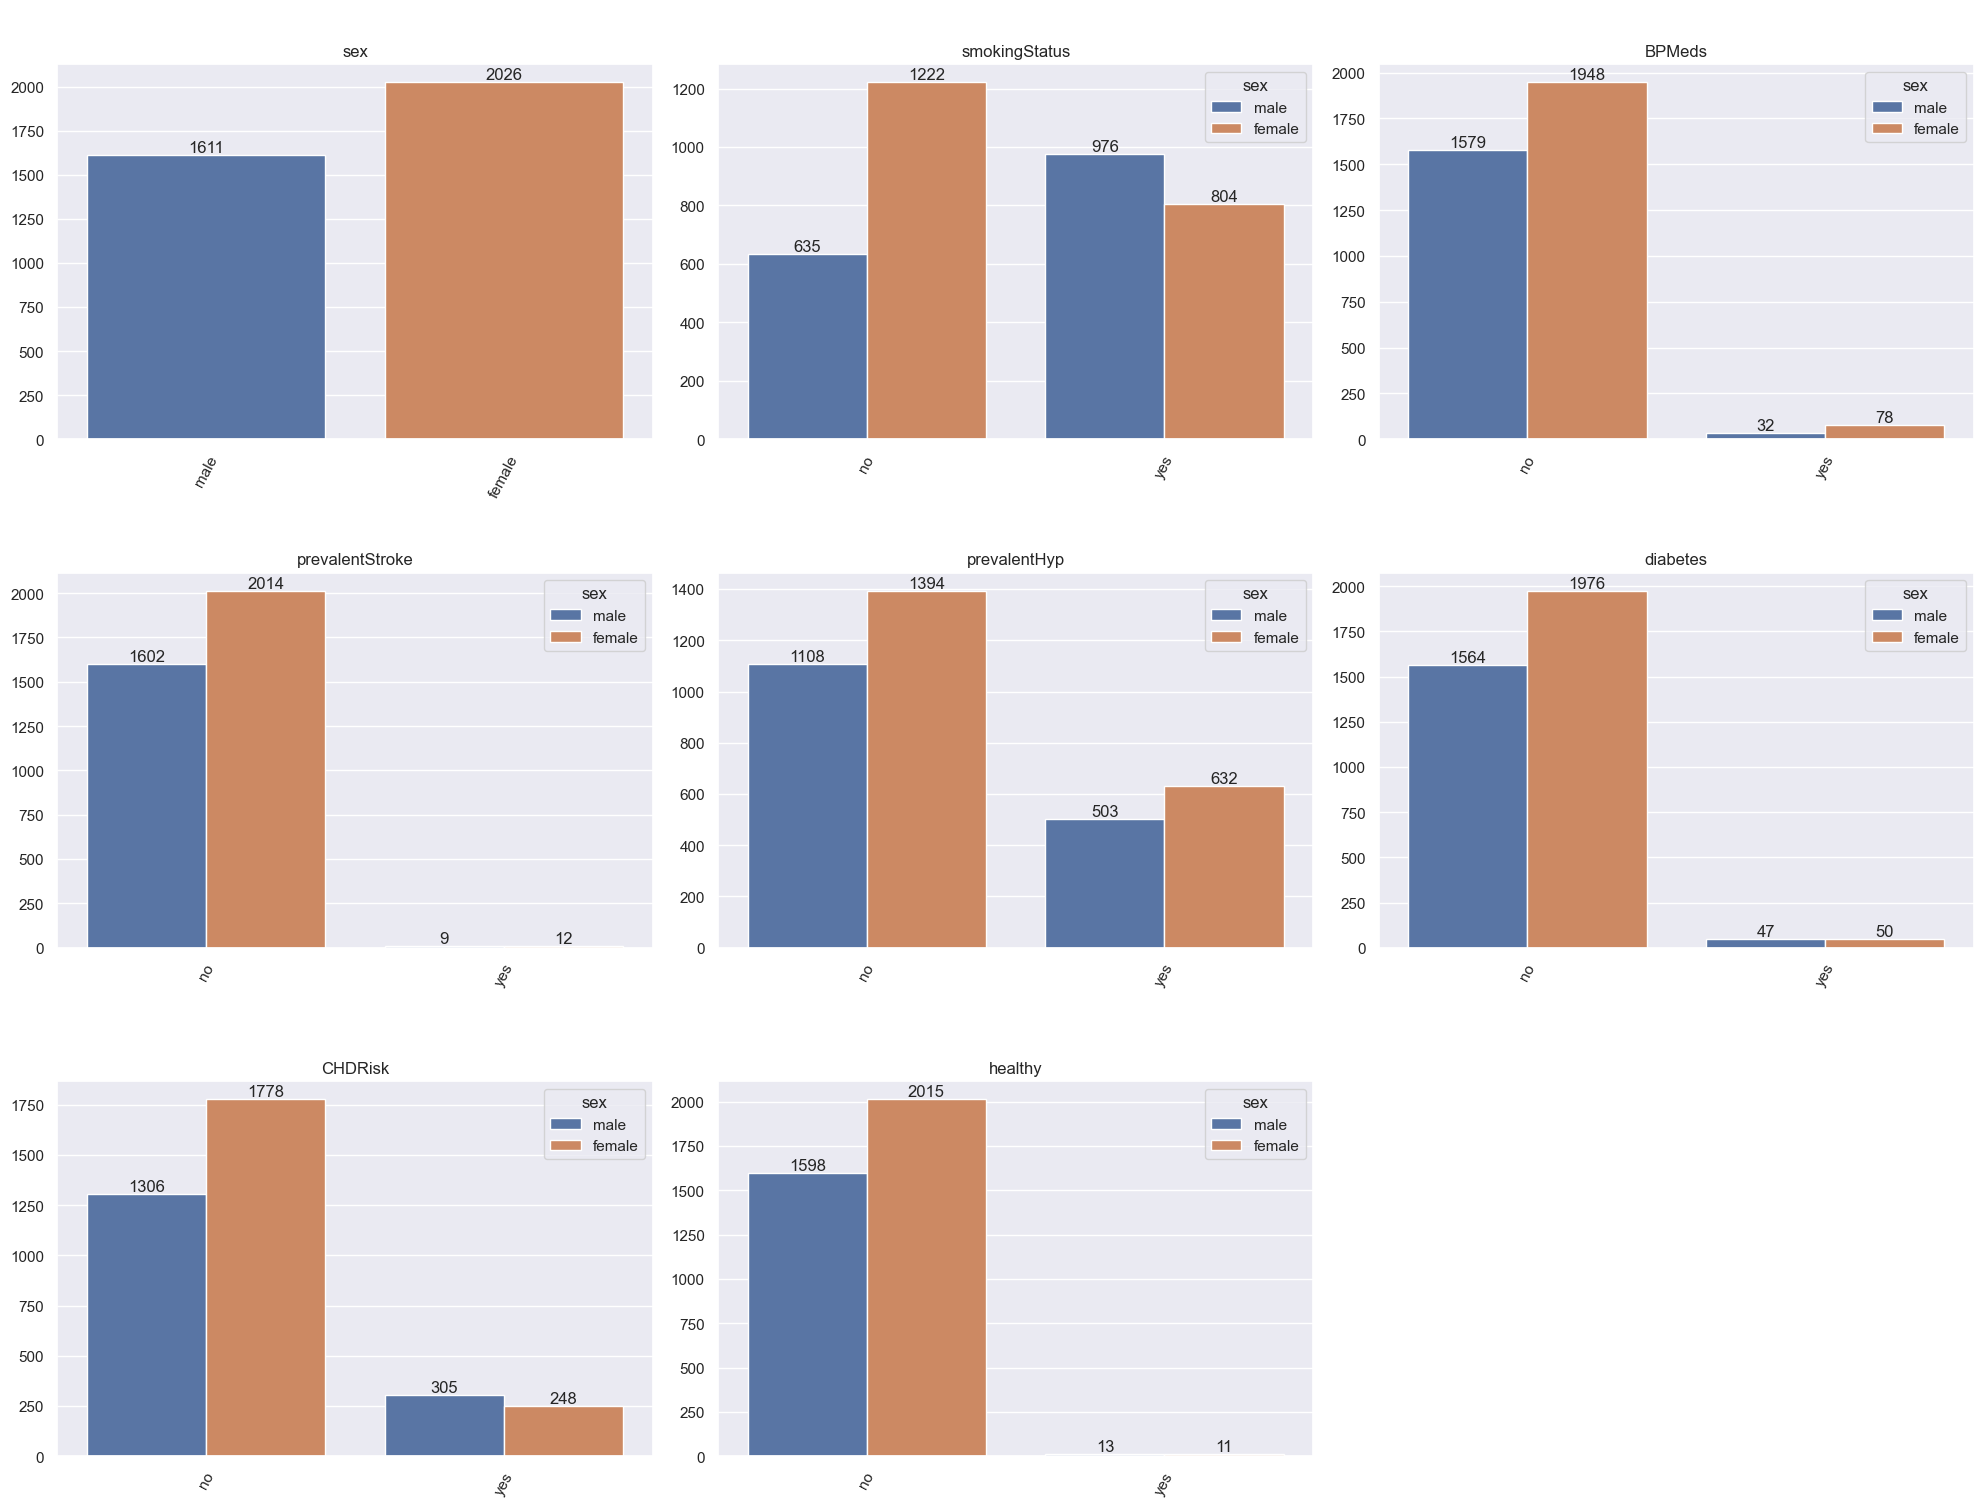

In [45]:

plt.figure(figsize=(20, 25))

from matplotlib.ticker import FixedLocator
for e, col in enumerate(bool):

    plt.subplot(5, 3, e+1)
    ax = sns.countplot(data=bool, x=col, hue='sex')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title('\n\n' + col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    locs, labels = plt.xticks()

    ax.xaxis.set_major_locator(FixedLocator(locs))
    ax.set_xticklabels(labels, rotation=62)

plt.tight_layout()
plt.show()

In [46]:
bool_male = bool[bool.sex == 'male']
bool_female = bool[bool.sex == 'female']

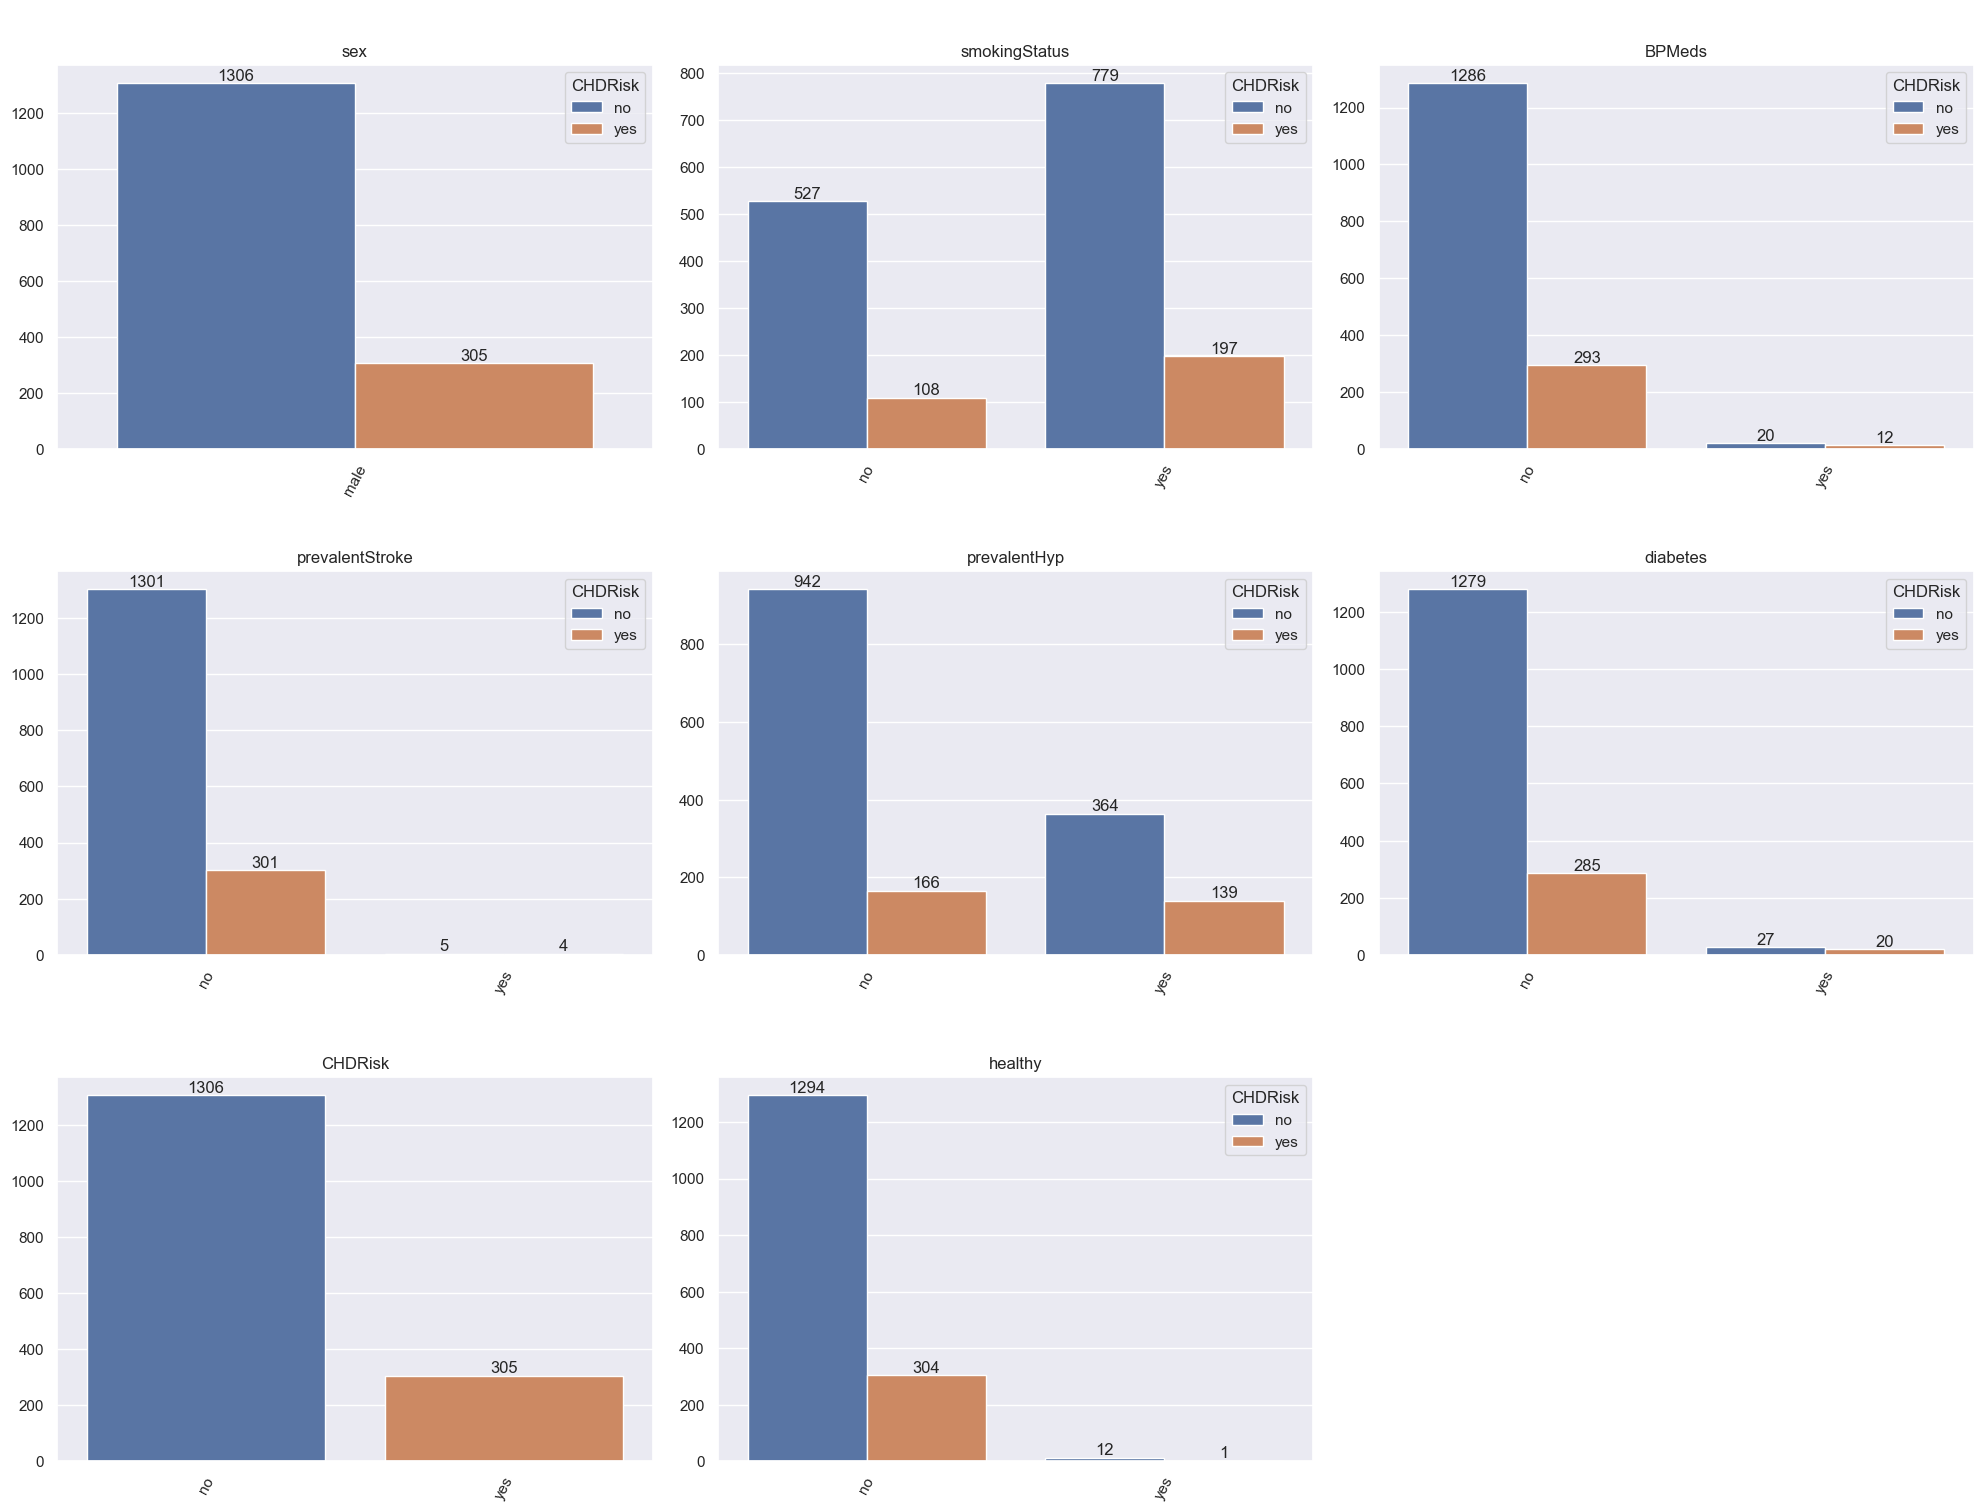

In [47]:
plt.figure(figsize=(20, 25))

from matplotlib.ticker import FixedLocator
for e, col in enumerate(bool_male):
    plt.subplot(5, 3, e+1)
    ax = sns.countplot(data=bool_male, x=col, hue='CHDRisk')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title('\n\n' + col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    # Get the current locations and labels.
    locs, labels = plt.xticks()

    # Set the locations and labels.
    ax.xaxis.set_major_locator(FixedLocator(locs))
    ax.set_xticklabels(labels, rotation=62)

plt.tight_layout()
plt.show()

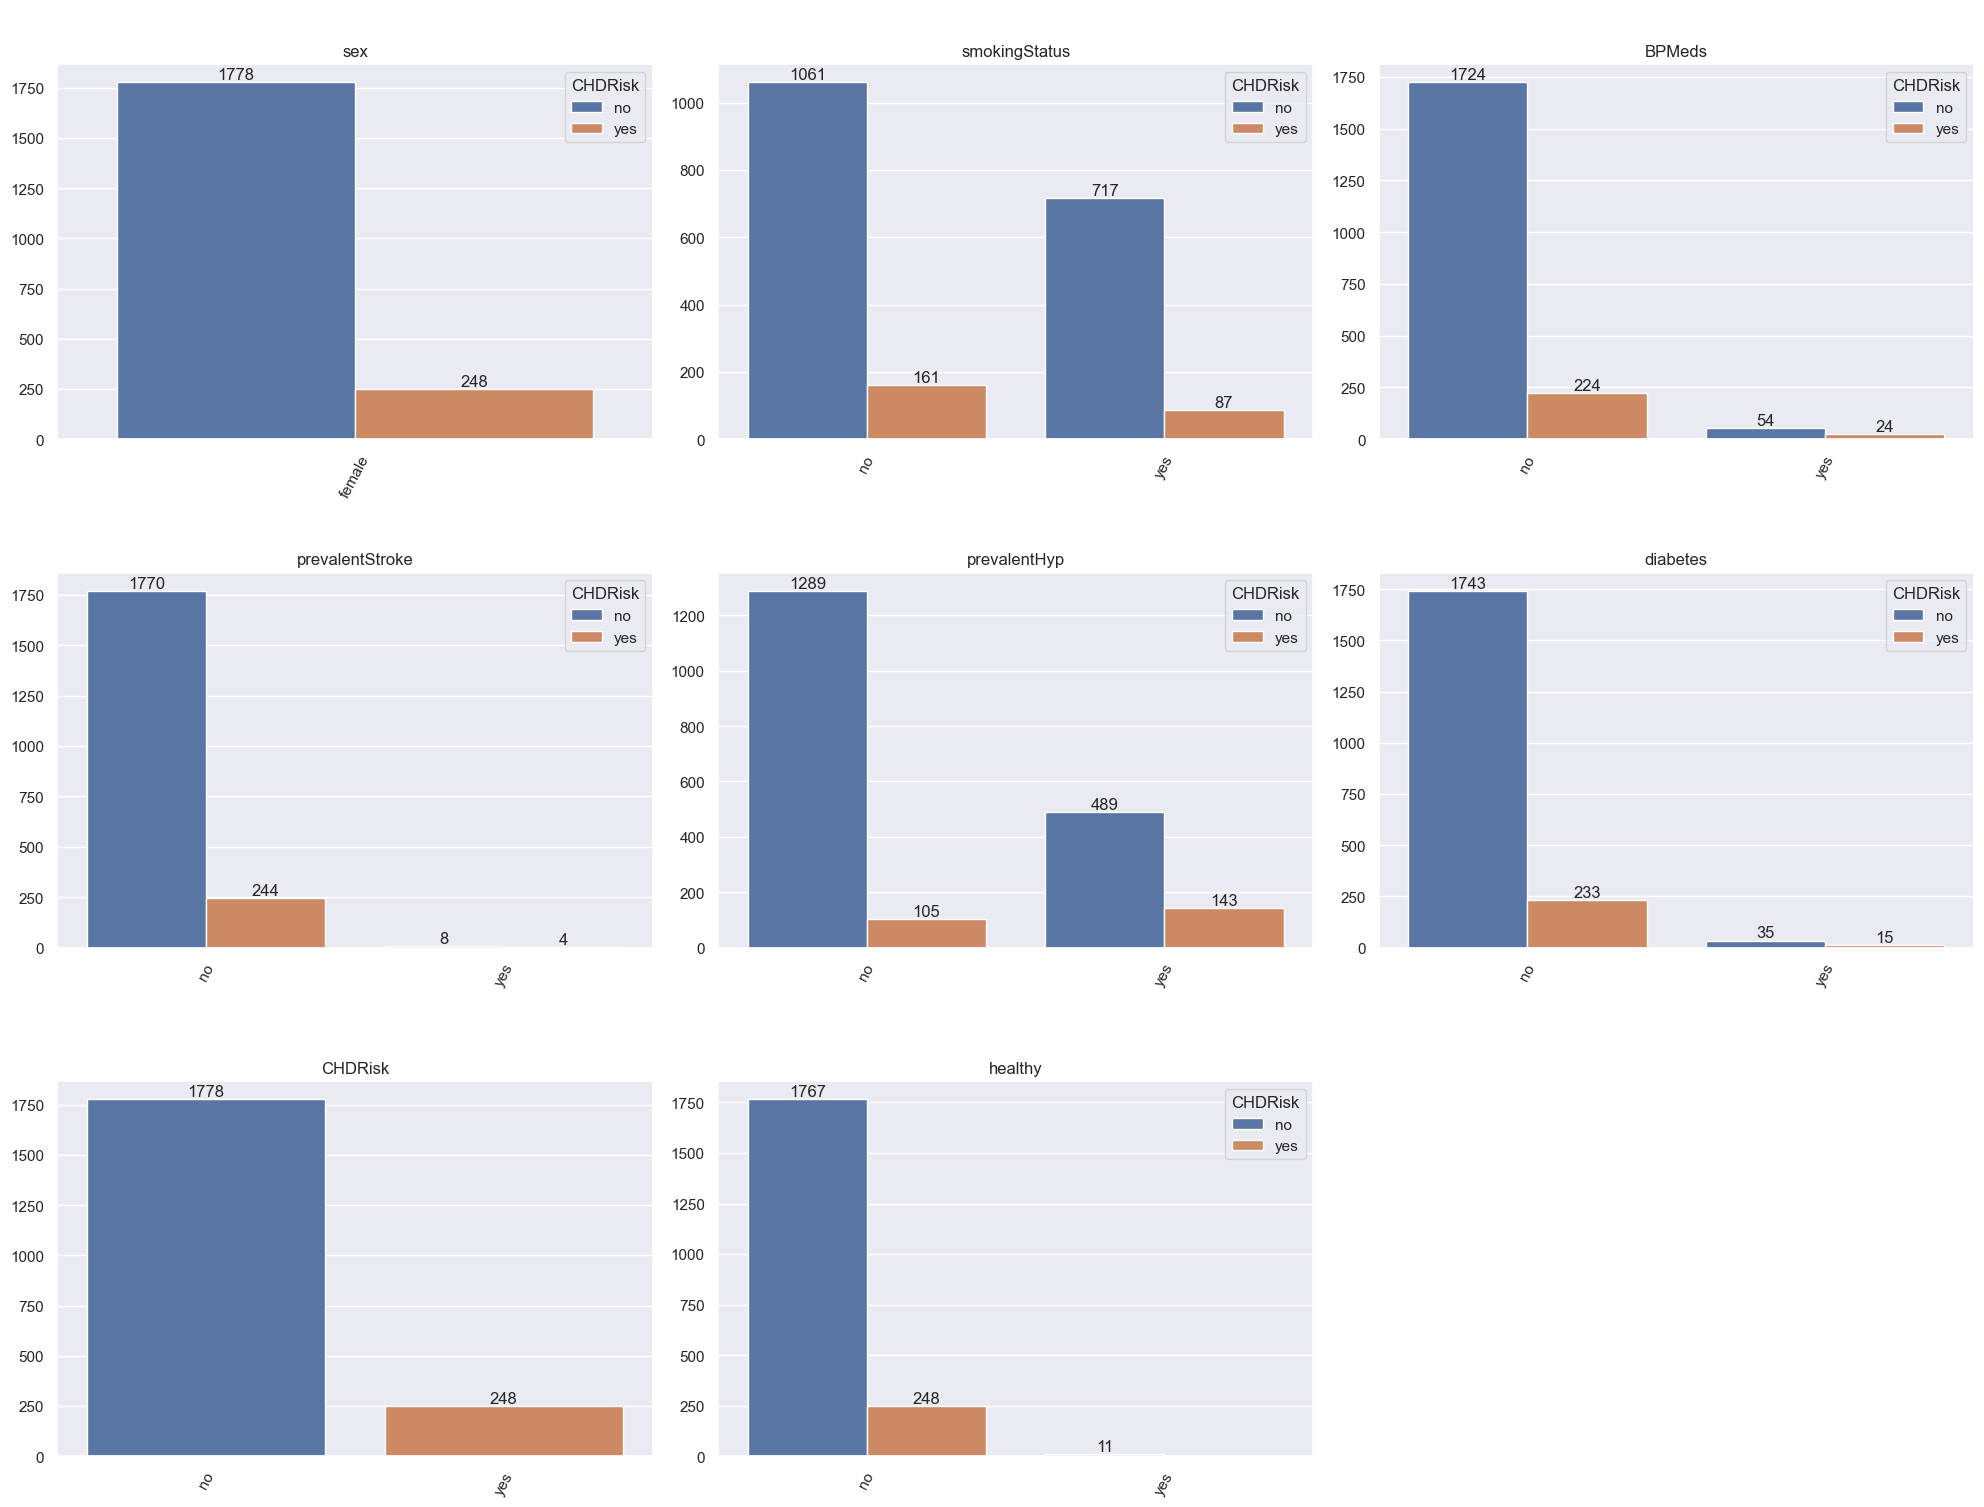

In [49]:
plt.figure(figsize=(20, 25))

from matplotlib.ticker import FixedLocator
for e, col in enumerate(bool_female):
    plt.subplot(5, 3, e+1)
    ax = sns.countplot(data=bool_female, x=col, hue='CHDRisk')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title('\n\n' + col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    # Get the current locations and labels.
    locs, labels = plt.xticks()

    # Set the locations and labels.
    ax.xaxis.set_major_locator(FixedLocator(locs))
    ax.set_xticklabels(labels, rotation=62)

plt.tight_layout()
plt.show()